## Importing necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import davies_bouldin_score
import seaborn as sns

In [5]:
file=pd.read_csv('../data/merged_data.csv')

In [65]:
X=file.drop(columns=['Unnamed: 0',"FIPS","State","Life Expectancy","County","Presence of Water Violation","Other Primary Care Provider Ratio","countycode"],axis=1)

In [66]:
X.head()

Deaths  Years of Potential Life Lost Rate  % Fair or Poor Health  \
0   791.0                        8128.591190              20.882987   
1  2967.0                        7354.122530              17.509134   
2   472.0                       10253.573403              29.591802   
3   471.0                       11977.539484              19.439724   
4  1085.0                       11335.071134              21.745293   

   Average Number of Physically Unhealthy Days  \
0                                     4.743889   
1                                     4.224519   
2                                     5.430279   
3                                     4.591482   
4                                     4.860808   

   Average Number of Mentally Unhealthy Days  % Low Birthweight  % Smokers  \
0                                   4.654031           8.619529  18.081557   
1                                   4.304056           8.345003  17.489033   
2                                   5.185594          11.474559  21.999985   
3                                   4.551699          10.308710  19.114200   
4                                   4.891455           7.604563  19.208672   

   Food Environment Index  % Physically Inactive  \
0                     7.2                   34.7   
1                     8.0                   26.5   
2                     5.6                   23.5   
3                     7.8                   33.5   
4                     8.4                   30.3   

   % With Access to Exercise Opportunities  ...  internet_nonconsumer  \
0                                69.130124  ...                 1.000   
1                                73.713549  ...                 9.000   
2                                53.166770  ...                 1.000   
3                                16.251364  ...                 0.698   
4                                15.634486  ...                 1.000   

   internet_all  internet_hhs  internet_ratio  covid_cases  covid_deaths  \
0          17.0        21.054           0.750         1241            23   
1          80.0        76.133           0.920         3776            32   
2           6.0         9.191           0.540          646             6   
3           4.0         6.916           0.698          464             6   
4          14.0        20.690           0.620          967             5   

   internet_percent  %  Adults with Obesity  Heart Disease Death Rate  \
0              75.0                    32.7                     388.7   
1              92.0                    30.1                     362.6   
2              54.0                    41.2                     444.3   
3              69.8                    37.4                     491.8   
4              62.0                    32.5                     437.9   

   Hypertension Death Rate  
0                    179.6  
1                    143.4  
2                    217.2  
3                    143.3  
4                    112.4  

[5 rows x 80 columns]

In [67]:
X.shape

(3100, 80)

### Column details

In [68]:
X.describe()

Deaths  Years of Potential Life Lost Rate  % Fair or Poor Health  \
count   3100.000000                        3100.000000            3100.000000   
mean    1200.589677                        7827.091920              17.941393   
std     3133.798963                        3436.128384               4.728566   
min        0.000000                           0.000000               8.120645   
25%      178.000000                        6291.289478              14.330513   
50%      409.000000                        8003.773251              17.230312   
75%      976.500000                        9927.314540              20.925938   
max    84296.000000                       29138.378057              40.990687   

       Average Number of Physically Unhealthy Days  \
count                                  3100.000000   
mean                                      3.991602   
std                                       0.702353   
min                                       2.449054   
25%                                       3.475977   
50%                                       3.936494   
75%                                       4.441717   
max                                       6.552513   

       Average Number of Mentally Unhealthy Days  % Low Birthweight  \
count                                3100.000000        3100.000000   
mean                                    4.170133           7.921836   
std                                     0.601551           2.414836   
min                                     2.532818           0.000000   
25%                                     3.754056           6.692913   
50%                                     4.175720           7.762506   
75%                                     4.577316           9.041310   
max                                     6.313753          24.390244   

         % Smokers  Food Environment Index  % Physically Inactive  \
count  3100.000000             3100.000000            3100.000000   
mean     17.482486                7.429032              27.388065   
std       3.569744                1.256604               5.705178   
min       5.908719                0.000000               9.500000   
25%      14.976697                6.900000              23.600000   
50%      16.982250                7.700000              27.200000   
75%      19.756380                8.200000              31.100000   
max      41.491309               10.000000              49.900000   

       % With Access to Exercise Opportunities  ...  internet_nonconsumer  \
count                              3100.000000  ...           3100.000000   
mean                                 62.925927  ...              2.746771   
std                                  23.252200  ...              9.712527   
min                                   0.000000  ...              0.000000   
25%                                  48.576080  ...              0.000000   
50%                                  65.996779  ...              1.000000   
75%                                  80.155007  ...              2.000000   
max                                 100.000000  ...            305.000000   

       internet_all  internet_hhs  internet_ratio    covid_cases  \
count   3100.000000   3100.000000     3100.000000    3100.000000   
mean      32.278817     37.524221        0.699828    1600.755806   
std      104.880206    112.298573        0.172544    6929.971719   
min        0.000000      0.152000        0.110000       1.000000   
25%        3.000000      4.337500        0.610000      64.000000   
50%        7.000000      9.948000        0.698000     230.000000   
75%       20.000000     25.928250        0.780000     793.000000   
max     3054.000000   3295.198000        3.330000  214197.000000   

       covid_deaths  internet_percent  %  Adults with Obesity  \
count   3100.000000       3100.000000             3100.000000   
mean      50.353226         69.982839               33.483290   
std      268.364932         17.2

In [69]:
# Checking for presence of null values in any column

null_col=X.columns[X.isnull().any()].tolist()  
if len(null_col)>0:
    print(null_col)
else:
    print(" No null columns found")

 No null columns found


In [70]:
for val in null_col:
    print("The {} column has {} missing values".format(val,X[val].isnull().sum()))

In [71]:
#listing all the columns with type str
for val in X.columns:
    if type(X[val][0])==str:
        print(val)

# Variance threshold to drop low variance data

In [72]:
def Drop(l1, l2): 
    dif = [i for i in l1  if i not in l2] 
    return dif 

In [73]:
feature_drop={}

for th in range(0,50,5):
    thresh = VarianceThreshold(threshold=th)
    thresh.fit(X)
    dropped_list=Drop(X.columns.tolist(),X.columns[thresh.get_support()].tolist())
    feature_drop[th]=(dropped_list,len(dropped_list))
    print("For threshold of {} the number of features dropped are {}".format(th,len(dropped_list)))




For threshold of 0 the number of features dropped are 0
For threshold of 5 the number of features dropped are 11
For threshold of 10 the number of features dropped are 16
For threshold of 15 the number of features dropped are 21
For threshold of 20 the number of features dropped are 25
For threshold of 25 the number of features dropped are 28
For threshold of 30 the number of features dropped are 28
For threshold of 35 the number of features dropped are 32
For threshold of 40 the number of features dropped are 33
For threshold of 45 the number of features dropped are 33


##### Since data is normalized so it does not contain lagre variance

## Data stored in following format 

###  [       { " Threshold Value" :  (  [ 'Dropped features']  ,  'name of dropped features')  }  , { }..........  ]

In [74]:
feature_drop

{0: ([], 0),
 5: (['Average Number of Physically Unhealthy Days',
   'Average Number of Mentally Unhealthy Days',
   'Food Environment Index',
   '% Unemployed',
   'Income Ratio',
   'Average Daily PM2.5',
   '% Frequent Mental Distress',
   'Average Reading Performance',
   'Average Math Performance',
   '% Native Hawaiian/Other Pacific Islander',
   'internet_ratio'],
  11),
 10: (['Average Number of Physically Unhealthy Days',
   'Average Number of Mentally Unhealthy Days',
   '% Low Birthweight',
   'Food Environment Index',
   '% Excessive Drinking',
   '% Unemployed',
   'Income Ratio',
   'Average Daily PM2.5',
   '% Frequent Mental Distress',
   'Average Reading Performance',
   'Average Math Performance',
   '% Asian',
   '% Native Hawaiian/Other Pacific Islander',
   '% Not Proficient in English',
   '% Female',
   'internet_ratio'],
  16),
 15: (['Average Number of Physically Unhealthy Days',
   'Average Number of Mentally Unhealthy Days',
   '% Low Birthweight',
   '% Smok

In [75]:
thresh.variances_

array([9.81752797e+06, 1.18031696e+07, 2.23521190e+01, 4.93140757e-01,
       3.61746702e-01, 5.82955103e+00, 1.27389639e+01, 1.57854422e+00,
       3.25385543e+01, 5.40490408e+02, 9.96084270e+00, 2.24464884e+02,
       8.33615105e+04, 2.28389018e+02, 1.31210329e+03, 1.01679924e+03,
       6.53430530e+01, 1.00932083e+02, 2.58309001e+02, 1.38778843e+02,
       2.06101412e+00, 7.85494373e+01, 5.83567740e-01, 1.11376802e+02,
       3.38933834e+01, 3.84809843e+04, 8.09102237e+02, 4.51885513e+00,
       1.93504949e+01, 5.50742708e+01, 1.55883402e+02, 1.48018318e+04,
       1.24457453e+03, 1.32472043e+01, 3.87718219e+00, 1.64056358e+01,
       3.73417341e+04, 1.56401529e+01, 6.35460870e+01, 2.12064671e+02,
       1.14946919e+02, 1.72587016e+01, 3.87886278e+01, 1.29648490e+01,
       3.25479284e+01, 1.51430738e+00, 1.56489253e+00, 1.93569630e+08,
       4.40253718e+02, 6.33250530e+02, 2.41228904e+02, 2.02944253e+01,
       1.02776089e+02, 8.38829990e+01, 3.86501676e+02, 6.63701172e+01,
      

In [76]:
thresh.get_support()

array([ True,  True, False, False, False, False, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True,  True,  True, False, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True,  True, False,  True, False, False,  True,  True, False,
       False,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False,  True,  True])

# Correlation Matrix

In [77]:
X

Deaths  Years of Potential Life Lost Rate  % Fair or Poor Health  \
0      791.0                        8128.591190              20.882987   
1     2967.0                        7354.122530              17.509134   
2      472.0                       10253.573403              29.591802   
3      471.0                       11977.539484              19.439724   
4     1085.0                       11335.071134              21.745293   
...      ...                                ...                    ...   
3095   532.0                        7831.827655              14.813082   
3096   109.0                        2730.603992              11.914358   
3097   256.0                        7330.683549              15.537464   
3098   110.0                        6586.049959              15.955971   
3099    89.0                        5388.706947              13.934025   

      Average Number of Physically Unhealthy Days  \
0                                        4.743889   
1                                        4.224519   
2                                        5.430279   
3                                        4.591482   
4                                        4.860808   
...                                           ...   
3095                                     3.402029   
3096                                     3.031233   
3097                                     3.628488   
3098                                     3.613308   
3099                                     3.463619   

      Average Number of Mentally Unhealthy Days  % Low Birthweight  % Smokers  \
0                                      4.654031           8.619529  18.081557   
1                                      4.304056           8.345003  17.489033   
2                                      5.185594          11.474559  21.999985   
3                                      4.551699          10.308710  19.114200   
4                                      4.891455           7.604563  19.208672   
...                                         ...                ...        ...   
3095                                   3.623554           9.705248  18.073422   
3096                                   3.180613           7.736721  14.546369   
3097                                   3.669805          10.110206  17.212675   
3098                                   3.682514           7.028754  16.859400   
3099                                   3.660440           6.589147  16.693134   

      Food Environment Index  % Physically Inactive  \
0                        7.2                   34.7   
1                        8.0                   26.5   
2                        5.6                   23.5   
3                        7.8                   33.5   
4                        8.4                   30.3   
...                      ...                    ...   
3095                     7.7                   25.0   
3096                     8.2                   11.6   
3097                     7.4                   27.2   
3098                     8.3                   28.2   
3099                     7.9                   26.9   

      % With Access to Exercise Opportunities  ...  internet_nonconsumer  \
0                                   69.130124  ...                 1.000   
1                                   73.713549  ...                 9.000   
2                                   53.166770  ...                 1.000   
3                                   16.251364  ...                 0.698   
4                                   15.634486  ...                 1.000   
...                                       ...  ...                   ...   
3095                                89.686344  ...                 1.000   
3096                                99.718230  ...                 2.000   
3097                                84.018373  ...                 1.000   
3098                                83.182937  ...                 0.000   
3099      

In [78]:
Correlation_Matrix=X.corr().abs()
Correlation_Matrix

Deaths  \
Deaths                                       1.000000   
Years of Potential Life Lost Rate            0.022367   
% Fair or Poor Health                        0.049483   
Average Number of Physically Unhealthy Days  0.066521   
Average Number of Mentally Unhealthy Days    0.032313   
...                                               ...   
covid_deaths                                 0.740413   
internet_percent                             0.198775   
%  Adults with Obesity                       0.169474   
Heart Disease Death Rate                     0.099079   
Hypertension Death Rate                      0.031028   

                                             Years of Potential Life Lost Rate  \
Deaths                                                                0.022367   
Years of Potential Life Lost Rate                                     1.000000   
% Fair or Poor Health                                                 0.583520   
Average Number of Physically Unhealthy Days                           0.637608   
Average Number of Mentally Unhealthy Days                             0.628542   
...                                                                        ...   
covid_deaths                                                          0.059026   
internet_percent                                                      0.310026   
%  Adults with Obesity                                                0.427243   
Heart Disease Death Rate                                              0.574644   
Hypertension Death Rate                                               0.311591   

                                             % Fair or Poor Health  \
Deaths                                                    0.049483   
Years of Potential Life Lost Rate                         0.583520   
% Fair or Poor Health                                     1.000000   
Average Number of Physically Unhealthy Days               0.890458   
Average Number of Mentally Unhealthy Days                 0.781139   
...                                                            ...   
covid_deaths                                              0.026192   
internet_percent                                          0.441647   
%  Adults with Obesity                                    0.403088   
Heart Disease Death Rate                                  0.598842   
Hypertension Death Rate                                   0.363663   

                                             Average Number of Physically Unhealthy Days  \
Deaths                                                                          0.066521   
Years of Potential Life Lost Rate                                               0.637608   
% Fair or Poor Health                                                           0.890458   
Average Number of Physically Unhealthy Days                                     1.000000   
Average Number of Mentally Unhealthy Days                                       0.934640   
...                                                                                  ...   
covid_deaths                                                                    0.069149   
internet_percent                                                                0.380646   
%  Adults with Obesity                                                          0.381975   
Heart Disease Death Rate                                                        0.609864   
Hypertension Death Rate                                                         0.283048   

                                             Average Number of Mentally Unhealthy Days  \
Deaths                                                                        0.032313   
Years of Potential Life Lost Rate                                             0.628542   
% Fair or Poor Health                                                         0.781139   
Average Number of Physically Unhealthy Days                            

In [79]:
# import seaborn as sn
# import matplotlib.pyplot as plt
# plt.figure(figsize=[256,256],dpi=100)
# sn.heatmap(Correlation_Matrix, annot=True)
# # plt.savefig('heatmap.png')
# plt.show()

## Simulating feature drop based on correlation matrix

In [80]:
# Select upper triangle of correlation matrix

feat_drop_corr=[]

for i in range(50,100,5):
    d={}
    coff=(i/100)
    upper = Correlation_Matrix.where(np.triu(np.ones(Correlation_Matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than some value
    to_drop = [column for column in upper.columns if any(upper[column] > coff)]

    # Drop features 
    X_new=X.drop(to_drop, axis=1, inplace=False)
    d[coff]=X_new.shape[-1] , to_drop
    feat_drop_corr.append(d)

In [81]:
feat_drop_corr

[{0.5: (31,
   ['% Fair or Poor Health',
    'Average Number of Physically Unhealthy Days',
    'Average Number of Mentally Unhealthy Days',
    '% Low Birthweight',
    '% Smokers',
    'Food Environment Index',
    '% Physically Inactive',
    '% Excessive Drinking',
    'Teen Birth Rate',
    'Dentist Rate',
    '% Vaccinated',
    '% Some College',
    '% Unemployed',
    '% Children in Poverty',
    'Income Ratio',
    '% Single-Parent Households',
    'Injury Death Rate',
    'Age-Adjusted Death Rate',
    'Infant Mortality Rate',
    '% Frequent Mental Distress',
    '% Adults with Diabetes',
    '% Food Insecure',
    '% Limited Access to Healthy Foods',
    'Motor Vehicle Mortality Rate',
    '% Insufficient Sleep',
    '% Children Uninsured',
    'Average Math Performance',
    'Median Household Income',
    '% Enrolled in Free or Reduced Lunch',
    'non-White/White Segregation Index',
    'Homicide Rate',
    'Firearm Fatalities Rate',
    '% Homeowners',
    '% Severe Hous

## Data stored in following format

###  [       { " Threshold Value" : 'number of remaining features' (  [ 'Dropped features']  ,)  }  ,{ } ..........  ]

In [82]:
X_new

Deaths  Years of Potential Life Lost Rate  % Fair or Poor Health  \
0      791.0                        8128.591190              20.882987   
1     2967.0                        7354.122530              17.509134   
2      472.0                       10253.573403              29.591802   
3      471.0                       11977.539484              19.439724   
4     1085.0                       11335.071134              21.745293   
...      ...                                ...                    ...   
3095   532.0                        7831.827655              14.813082   
3096   109.0                        2730.603992              11.914358   
3097   256.0                        7330.683549              15.537464   
3098   110.0                        6586.049959              15.955971   
3099    89.0                        5388.706947              13.934025   

      Average Number of Physically Unhealthy Days  \
0                                        4.743889   
1                                        4.224519   
2                                        5.430279   
3                                        4.591482   
4                                        4.860808   
...                                           ...   
3095                                     3.402029   
3096                                     3.031233   
3097                                     3.628488   
3098                                     3.613308   
3099                                     3.463619   

      Average Number of Mentally Unhealthy Days  % Low Birthweight  % Smokers  \
0                                      4.654031           8.619529  18.081557   
1                                      4.304056           8.345003  17.489033   
2                                      5.185594          11.474559  21.999985   
3                                      4.551699          10.308710  19.114200   
4                                      4.891455           7.604563  19.208672   
...                                         ...                ...        ...   
3095                                   3.623554           9.705248  18.073422   
3096                                   3.180613           7.736721  14.546369   
3097                                   3.669805          10.110206  17.212675   
3098                                   3.682514           7.028754  16.859400   
3099                                   3.660440           6.589147  16.693134   

      Food Environment Index  % Physically Inactive  \
0                        7.2                   34.7   
1                        8.0                   26.5   
2                        5.6                   23.5   
3                        7.8                   33.5   
4                        8.4                   30.3   
...                      ...                    ...   
3095                     7.7                   25.0   
3096                     8.2                   11.6   
3097                     7.4                   27.2   
3098                     8.3                   28.2   
3099                     7.9                   26.9   

      % With Access to Exercise Opportunities  ...  % Non-Hispanic White  \
0                                   69.130124  ...             74.308016   
1                                   73.713549  ...             83.111337   
2                                   53.166770  ...             45.641252   
3                                   16.251364  ...             74.589286   
4                                   15.634486  ...             86.886238   
...                                       ...  ...                   ...   
3095                                89.686344  ...             79.312908   
3096                                99.718230  ...             81.504268   
3097                                84.018373  ...             87.398394   
3098                                83.182937  ...             82.409639   
3099      

In [83]:
# for correlation 0.5

X_red=X.drop(feat_drop_corr[0][0.5][-1],axis=1)
X_red

Deaths  Years of Potential Life Lost Rate  \
0      791.0                        8128.591190   
1     2967.0                        7354.122530   
2      472.0                       10253.573403   
3      471.0                       11977.539484   
4     1085.0                       11335.071134   
...      ...                                ...   
3095   532.0                        7831.827655   
3096   109.0                        2730.603992   
3097   256.0                        7330.683549   
3098   110.0                        6586.049959   
3099    89.0                        5388.706947   

      % With Access to Exercise Opportunities  \
0                                   69.130124   
1                                   73.713549   
2                                   53.166770   
3                                   16.251364   
4                                   15.634486   
...                                       ...   
3095                                89.686344   
3096                                99.718230   
3097                                84.018373   
3098                                83.182937   
3099                                63.027192   

      % Driving Deaths with Alcohol Involvement  Chlamydia Rate  \
0                                     26.785714           407.2   
1                                     30.769231           325.0   
2                                     40.000000           716.3   
3                                     27.586207           339.7   
4                                     19.444444           234.4   
...                                         ...             ...   
3095                                  33.962264           227.4   
3096                                  22.222222           348.2   
3097                                  20.000000           151.3   
3098                                  20.000000           223.2   
3099                                  40.000000           231.0   

      Primary Care Physicians Rate  % With Annual Mammogram  \
0                         45.04180                     41.0   
1                         72.89727                     43.0   
2                         31.65809                     45.0   
3                         48.52656                     40.0   
4                         22.40877                     34.0   
...                            ...                      ...   
3095                      36.75288                     37.0   
3096                     116.05416                     42.0   
3097                      43.91315                     31.0   
3098                      49.60317                     30.0   
3099                      43.30879                     31.0   

      High School Graduation Rate  Social Association Rate  \
0                       90.000000                12.071202   
1                       86.361577                10.205617   
2                       81.410256                 7.518797   
3                       83.763838                 8.381860   
4                       93.468795                 8.446383   
...                           ...                      ...   
3095                    80.500000                10.336748   
3096                    87.765957                16.333548   
3097                    84.687500                 2.927543   
3098                    84.536082                16.121032   
3099                    90.476190                12.992638   

      Violent Crime Rate  ...  Suicide Rate (Age-Adjusted)  \
0             272.282220  ...                    18.145295   
1             203.660396  ...                    19.377511   
2             414.277861  ...                    12.836104   
3              89.349126  ...                    20.858766   
4             482.690611  ...                    17.062628   
...                  ...  ...                          ...   
3095          300.494146  ...                    22.299100   
3

In [84]:
X_red_corr=X_red.corr()
X_red_corr

Deaths  \
Deaths                                     1.000000   
Years of Potential Life Lost Rate         -0.022367   
% With Access to Exercise Opportunities    0.305419   
% Driving Deaths with Alcohol Involvement -0.007636   
Chlamydia Rate                             0.188089   
Primary Care Physicians Rate               0.210986   
% With Annual Mammogram                    0.027500   
High School Graduation Rate               -0.004446   
Social Association Rate                   -0.146187   
Violent Crime Rate                         0.298259   
Average Daily PM2.5                        0.193839   
% Severe Housing Problems                  0.316111   
% Drive Alone to Work                     -0.094604   
% Long Commute - Drives Alone              0.122584   
Child Mortality Rate                       0.141570   
HIV Prevalence Rate                        0.356919   
Drug Overdose Mortality Rate               0.240031   
% Uninsured                               -0.063024   
% Disconnected Youth                       0.160048   
Average Reading Performance               -0.087717   
Black/White Segregation Index              0.286252   
Suicide Rate (Age-Adjusted)                0.007636   
Juvenile Arrest Rate                       0.014554   
% less than 18 years of age                0.024107   
% American Indian & Alaska Native         -0.051649   
% Asian                                    0.414154   
% Native Hawaiian/Other Pacific Islander   0.080978   
% Hispanic                                 0.172574   
% Female                                   0.151167   
internet_ratio                             0.198775   
Hypertension Death Rate                   -0.031028   

                                           Years of Potential Life Lost Rate  \
Deaths                                                             -0.022367   
Years of Potential Life Lost Rate                                   1.000000   
% With Access to Exercise Opportunities                            -0.155315   
% Driving Deaths with Alcohol Involvement                           0.014141   
Chlamydia Rate                                                      0.395737   
Primary Care Physicians Rate                                       -0.126006   
% With Annual Mammogram                                            -0.244792   
High School Graduation Rate                                         0.073319   
Social Association Rate                                            -0.130731   
Violent Crime Rate                                                  0.272850   
Average Daily PM2.5                                                 0.339443   
% Severe Housing Problems                                           0.201626   
% Drive Alone to Work                                               0.296497   
% Long Commute - Drives Alone                                       0.147043   
Child Mortality Rate                                                0.429801   
HIV Prevalence Rate                                                 0.207721   
Drug Overdose Mortality Rate                                        0.279766   
% Uninsured                                                         0.167968   
% Disconnected Youth                                                0.261320   
Average Reading Performance                                         0.090886   
Black/White Segregation Index                                       0.189581   
Suicide Rate (Age-Adjusted)                                         0.389211   
Juvenile Arrest Rate                                                0.073190   
% less than 18 years of age                                         0.135773   
% American Indian & Alaska Native                                   0.242203   
% Asian                                                            -0.185043   
% Native Hawaiian/Other Pacific Islander                           -0.038199   
% Hispanic                                  

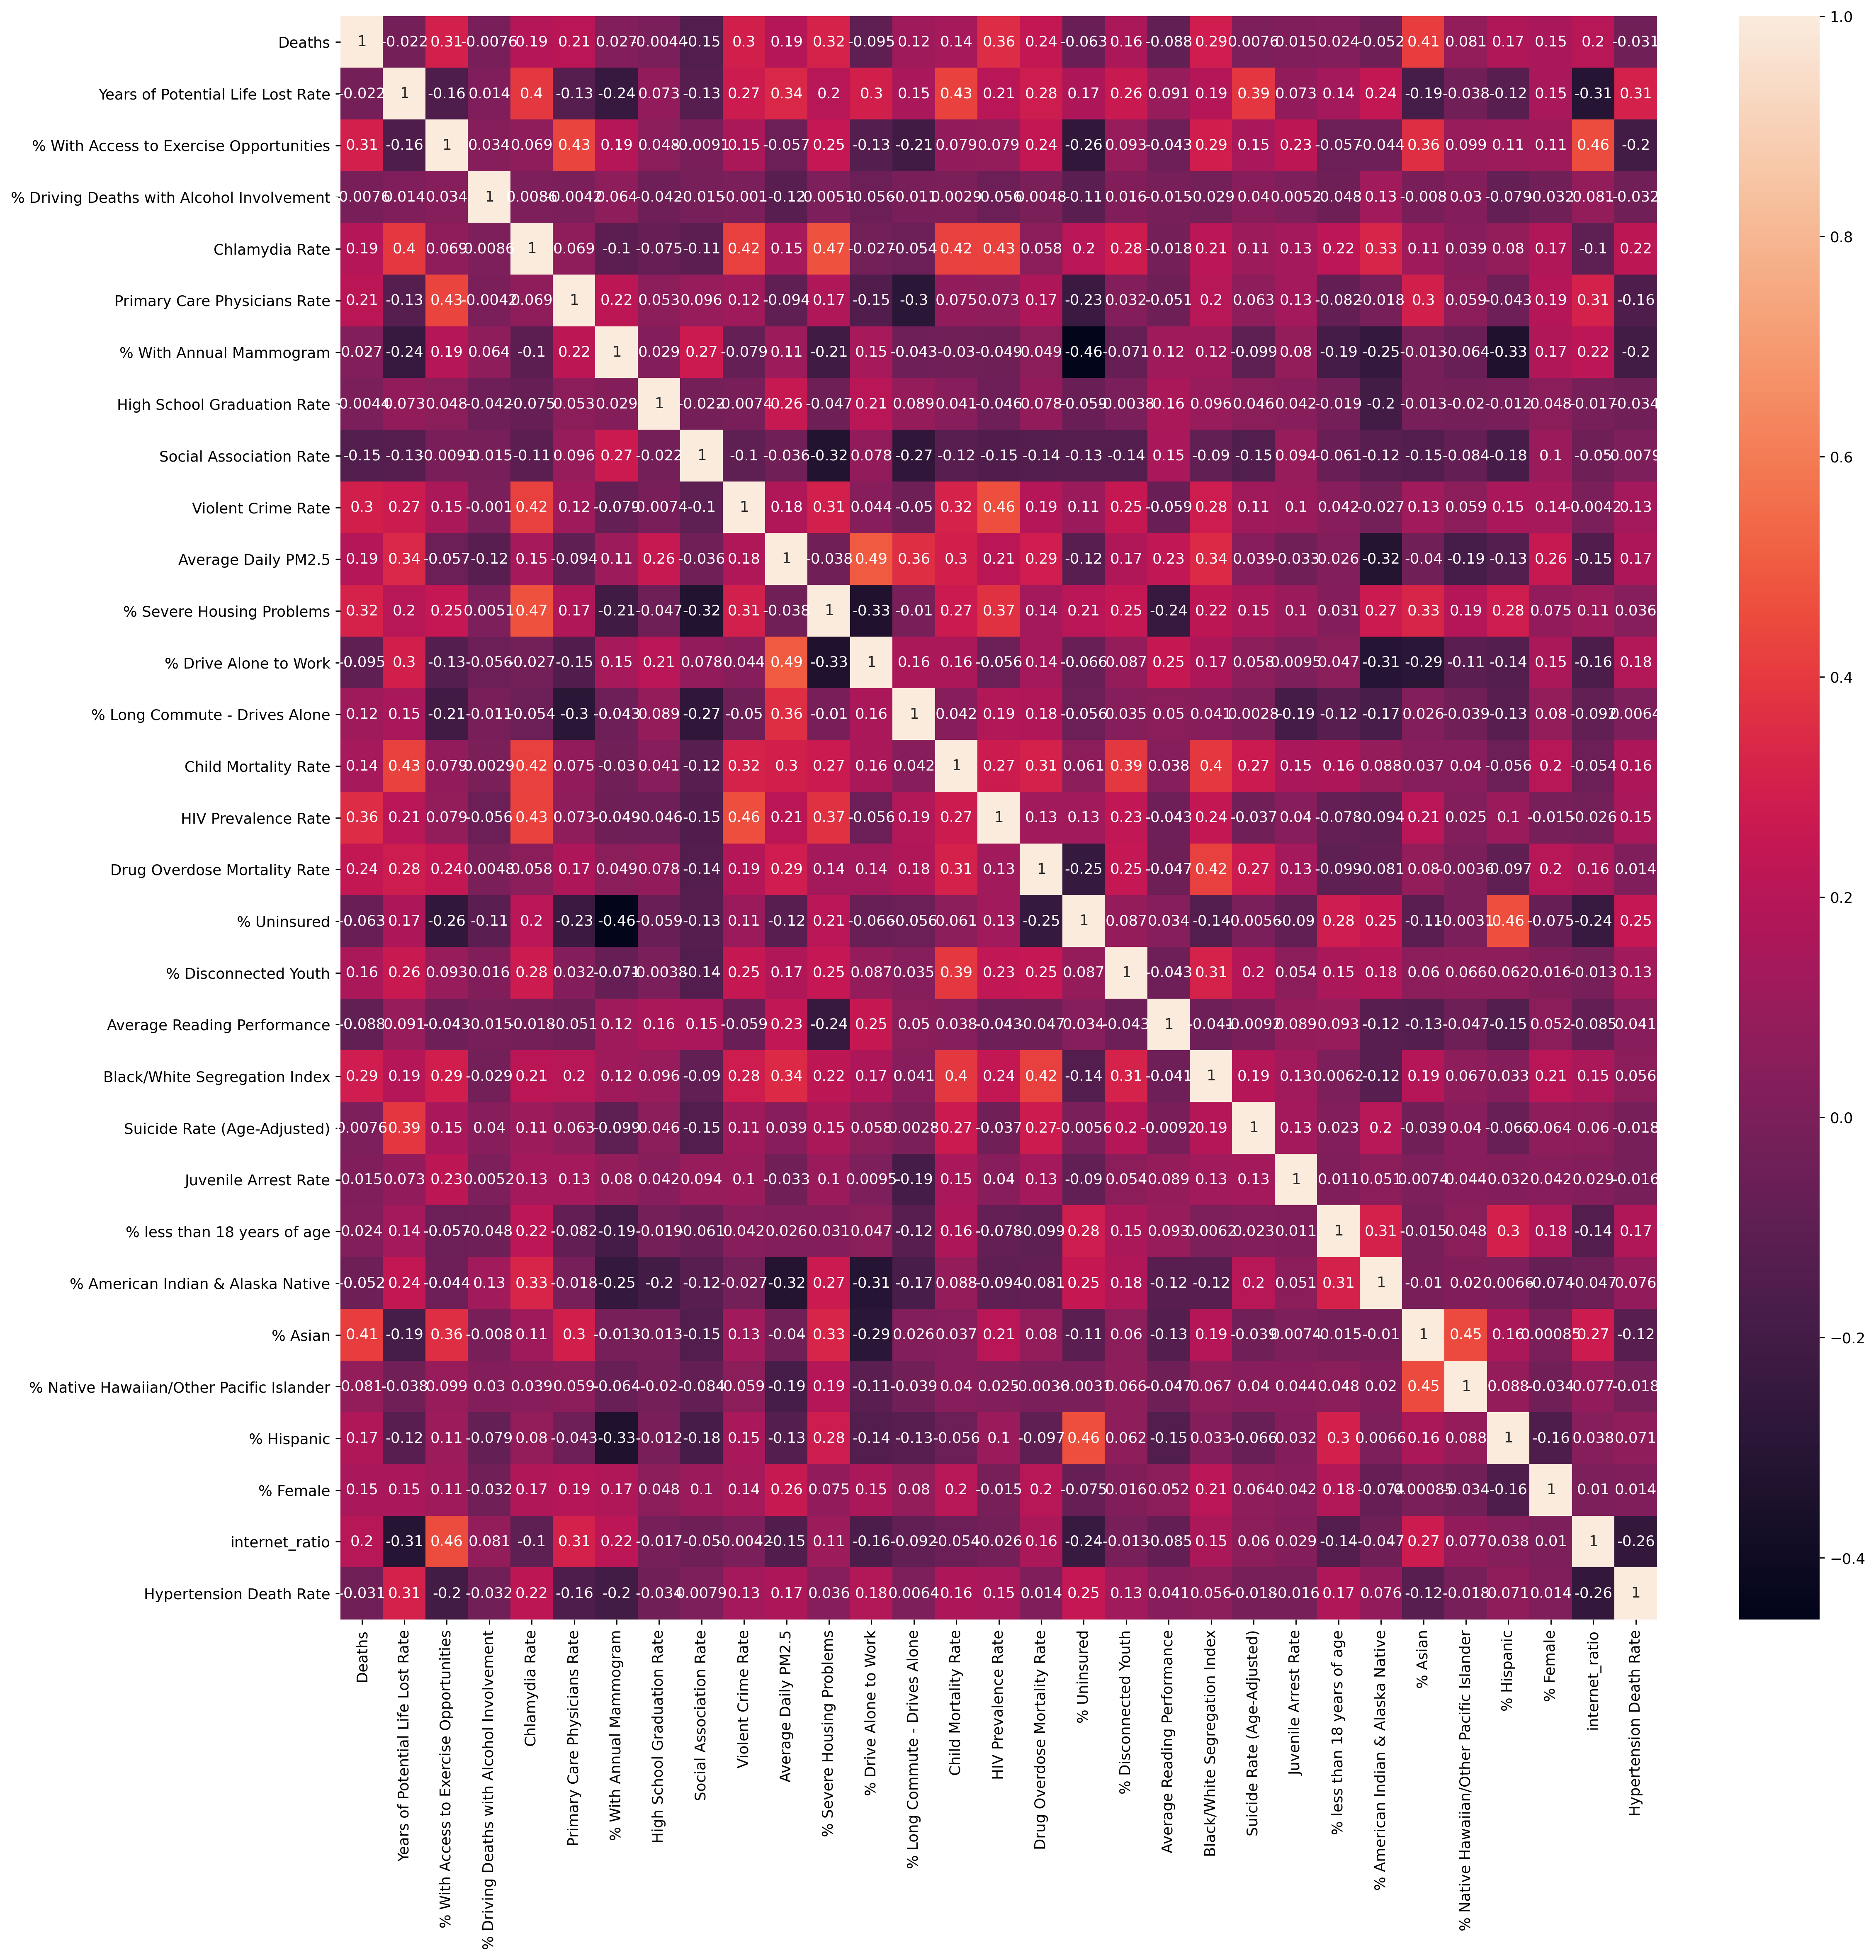

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[20,20],dpi=256)
sns.heatmap(X_red_corr, annot=True)

# plt.savefig('heatmap.png')         To save image 
plt.show()

# Kmeans

In [86]:
model=  KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )
model.fit(X_red)
label=pd.DataFrame(model.labels_)
X_red['class']=label
# file.dropna(inplace=True)
# file['class'].value_counts()
# X_red.to_csv('../data/4_cluster.csv')

In [87]:
X_red['class'].value_counts()


1    1620
0    1133
3     278
2      69
Name: class, dtype: int64

In [88]:
(model.cluster_centers_)

array([[6.54458959e+02, 1.10079991e+04, 5.33586911e+01, 2.73160851e+01,
        4.82230803e+02, 4.27682636e+01, 3.72691968e+01, 8.63020826e+01,
        1.12119917e+01, 2.88941211e+02, 9.53345102e+00, 1.43967115e+01,
        8.17835836e+01, 3.34534863e+01, 5.12675023e+01, 1.71490909e+02,
        1.48576684e+01, 1.57274120e+01, 5.12780270e+00, 2.51969311e+00,
        3.06244325e+01, 1.61636514e+01, 1.67838947e+01, 2.22988345e+01,
        3.64253056e+00, 7.53108762e-01, 9.47165995e-02, 7.43474885e+00,
        5.01388512e+01, 6.13442189e-01, 3.02249956e+02],
       [1.14283889e+03, 6.95397322e+03, 7.03170894e+01, 2.86783379e+01,
        3.41567346e+02, 5.93452383e+01, 4.29592593e+01, 8.82563032e+01,
        1.19175789e+01, 2.10630815e+02, 8.97228395e+00, 1.35966663e+01,
        7.98776584e+01, 3.08052469e+01, 3.38906676e+01, 1.09968704e+02,
        1.23847786e+01, 1.18189833e+01, 3.77037408e+00, 2.50097028e+00,
        3.30593124e+01, 1.46455550e+01, 2.01813599e+01, 2.20994041e+01,
       

In [89]:
label=pd.DataFrame(model.labels_)

In [90]:
label

0
0     1
1     1
2     0
3     0
4     0
...  ..
3095  1
3096  3
3097  1
3098  1
3099  1

[3100 rows x 1 columns]

In [91]:
X_red.shape

(3100, 32)

## Using predicted labels as class column for supervised feature importance score and cluster analysis

In [92]:
X_red['class']=label

In [93]:
X_red.dropna(inplace=True)

In [94]:
X_red['class'].unique()

array([1, 0, 2, 3], dtype=int32)

In [95]:
X1=X_red.drop(['class'],axis=1)

In [96]:
y1=X_red['class']

In [97]:
y1.isnull().sum()

0

### To install required package if missing

In [98]:
# !pip install xgboost

<AxesSubplot:>

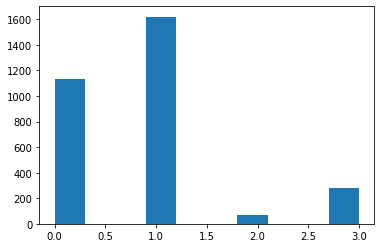

In [99]:
#class distribution
y1.hist(grid=False)

In [100]:
X1

Deaths  Years of Potential Life Lost Rate  \
0      791.0                        8128.591190   
1     2967.0                        7354.122530   
2      472.0                       10253.573403   
3      471.0                       11977.539484   
4     1085.0                       11335.071134   
...      ...                                ...   
3095   532.0                        7831.827655   
3096   109.0                        2730.603992   
3097   256.0                        7330.683549   
3098   110.0                        6586.049959   
3099    89.0                        5388.706947   

      % With Access to Exercise Opportunities  \
0                                   69.130124   
1                                   73.713549   
2                                   53.166770   
3                                   16.251364   
4                                   15.634486   
...                                       ...   
3095                                89.686344   
3096                                99.718230   
3097                                84.018373   
3098                                83.182937   
3099                                63.027192   

      % Driving Deaths with Alcohol Involvement  Chlamydia Rate  \
0                                     26.785714           407.2   
1                                     30.769231           325.0   
2                                     40.000000           716.3   
3                                     27.586207           339.7   
4                                     19.444444           234.4   
...                                         ...             ...   
3095                                  33.962264           227.4   
3096                                  22.222222           348.2   
3097                                  20.000000           151.3   
3098                                  20.000000           223.2   
3099                                  40.000000           231.0   

      Primary Care Physicians Rate  % With Annual Mammogram  \
0                         45.04180                     41.0   
1                         72.89727                     43.0   
2                         31.65809                     45.0   
3                         48.52656                     40.0   
4                         22.40877                     34.0   
...                            ...                      ...   
3095                      36.75288                     37.0   
3096                     116.05416                     42.0   
3097                      43.91315                     31.0   
3098                      49.60317                     30.0   
3099                      43.30879                     31.0   

      High School Graduation Rate  Social Association Rate  \
0                       90.000000                12.071202   
1                       86.361577                10.205617   
2                       81.410256                 7.518797   
3                       83.763838                 8.381860   
4                       93.468795                 8.446383   
...                           ...                      ...   
3095                    80.500000                10.336748   
3096                    87.765957                16.333548   
3097                    84.687500                 2.927543   
3098                    84.536082                16.121032   
3099                    90.476190                12.992638   

      Violent Crime Rate  ...  Suicide Rate (Age-Adjusted)  \
0             272.282220  ...                    18.145295   
1             203.660396  ...                    19.377511   
2             414.277861  ...                    12.836104   
3              89.349126  ...                    20.858766   
4             482.690611  ...                    17.062628   
...                  ...  ...                          ...   
3095          300.494146  ...                    22.299100   
3

In [101]:
# from xgboost import XGBClassifier
# model = XGBClassifier()
# model.fit(X1, y1)

from sklearn.ensemble import ExtraTreesClassifier as ETC
model=ETC()
model.fit(X1, y1)


ExtraTreesClassifier()

In [102]:
print(model.feature_importances_)


[0.06135098 0.30938723 0.03746287 0.01430549 0.02309552 0.01591455
 0.03206005 0.01550859 0.01788713 0.02238269 0.02607434 0.01549853
 0.01830375 0.01414561 0.04330787 0.0192263  0.02134368 0.03472616
 0.01451161 0.01630879 0.02231524 0.02903906 0.01941412 0.01277259
 0.0162995  0.0225544  0.0117446  0.01715583 0.01418337 0.03666923
 0.02505032]


In [103]:
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        model.estimators_], 
                                        axis = 0) 


## Feature importance score list

In [104]:
Feature_score=(sorted(zip(feature_importance_normalized, X1.columns), reverse=True))

In [105]:
Feature_score



[(0.11361244812843811, 'Years of Potential Life Lost Rate'),
 (0.034183364749967665, 'Deaths'),
 (0.02848161027554767, 'Child Mortality Rate'),
 (0.027168734025380666, 'internet_ratio'),
 (0.022090147214648026, '% With Access to Exercise Opportunities'),
 (0.019218423558186808, '% Uninsured'),
 (0.018246447013327956, '% With Annual Mammogram'),
 (0.016503044685257748, 'Suicide Rate (Age-Adjusted)'),
 (0.014389824258183529, 'Average Daily PM2.5'),
 (0.014173280540017834, 'Hypertension Death Rate'),
 (0.013043298692603114, 'Chlamydia Rate'),
 (0.012927233737786438, 'Black/White Segregation Index'),
 (0.012127129800152018, 'Juvenile Arrest Rate'),
 (0.01167335711019993, '% Asian'),
 (0.01111703373818505, 'Violent Crime Rate'),
 (0.01105095235989052, 'Drug Overdose Mortality Rate'),
 (0.009641101973655128, '% Drive Alone to Work'),
 (0.009115822273384143, 'Social Association Rate'),
 (0.0086746617657667, 'HIV Prevalence Rate'),
 (0.008431387589909245, '% Disconnected Youth'),
 (0.008134567

## Top 10 most important features with score

In [106]:
Feature_df=pd.DataFrame(data=Feature_score[:10],columns=['Importance_Score',"Feature_name"])

In [108]:
Feature_df

Importance_Score                             Feature_name
0          0.113612        Years of Potential Life Lost Rate
1          0.034183                                   Deaths
2          0.028482                     Child Mortality Rate
3          0.027169                           internet_ratio
4          0.022090  % With Access to Exercise Opportunities
5          0.019218                              % Uninsured
6          0.018246                  % With Annual Mammogram
7          0.016503              Suicide Rate (Age-Adjusted)
8          0.014390                      Average Daily PM2.5
9          0.014173                  Hypertension Death Rate

In [109]:
from sklearn.metrics import classification_report as clf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

In [110]:
from sklearn.ensemble import ExtraTreesClassifier
test_model=ExtraTreesClassifier()

In [111]:
test_model.fit(X_train,y_train)

ExtraTreesClassifier()

## Good results obtained as per the classification report of n_cluster=4

# Classification report of n_cluster=4 ( model -> ExtraTreeClassifier)

In [112]:
y_pred = test_model.predict(X_test)
print(clf(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.89      0.92       354
           1       0.91      0.96      0.94       553
           2       0.88      0.61      0.72        23
           3       1.00      0.96      0.98        93

    accuracy                           0.93      1023
   macro avg       0.93      0.86      0.89      1023
weighted avg       0.93      0.93      0.93      1023



# Cluster Distribution as per death column and some others

In [113]:
X_val=X_red['Deaths']

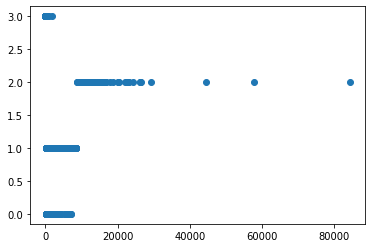

In [114]:
plt.scatter(X_val,y1,)

## Scatter Plot

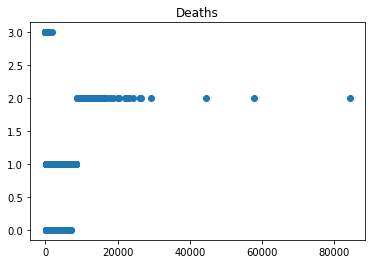

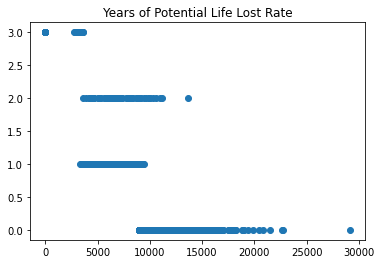

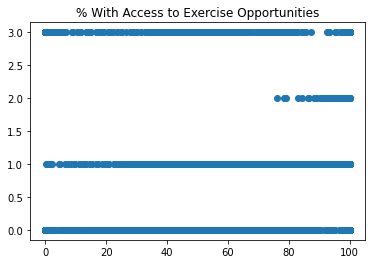

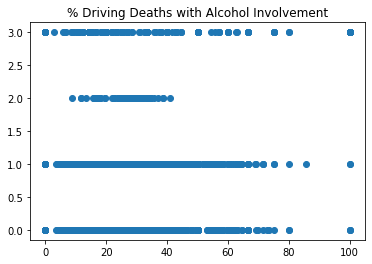

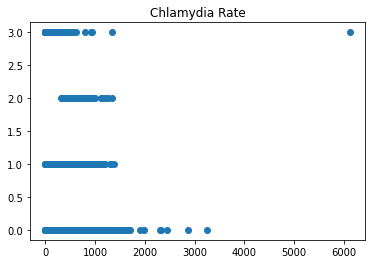

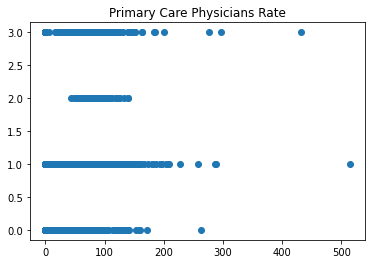

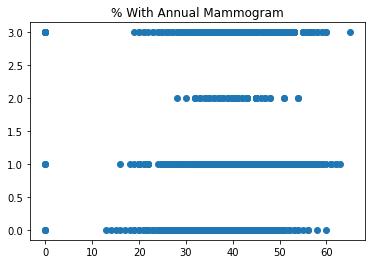

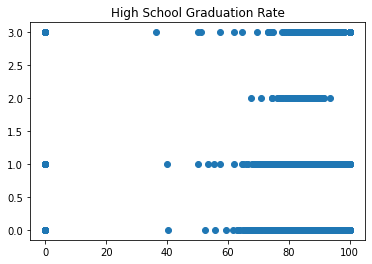

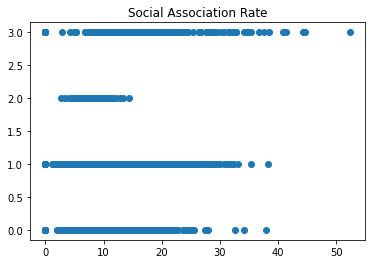

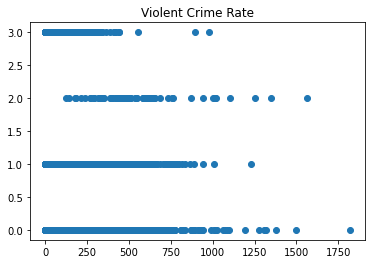

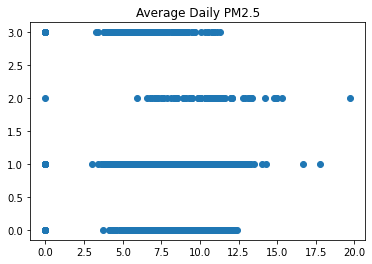

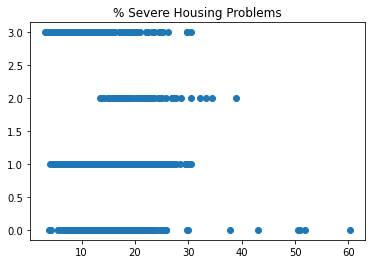

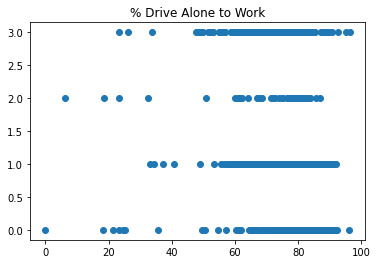

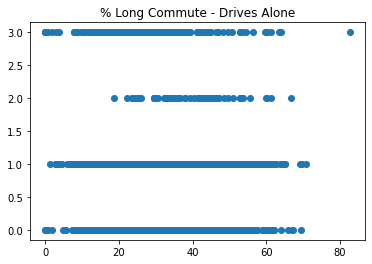

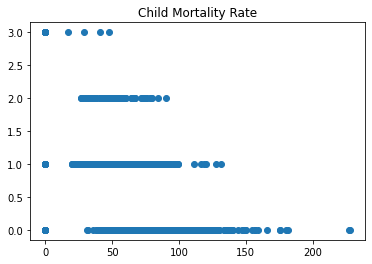

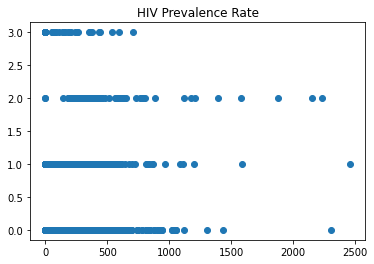

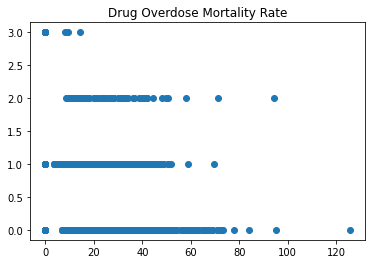

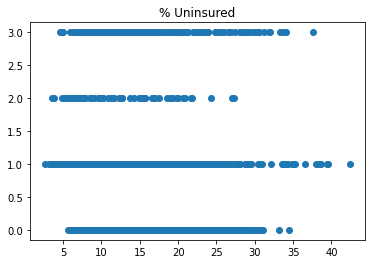

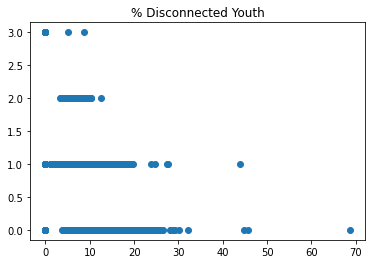

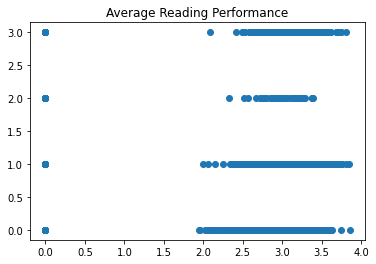

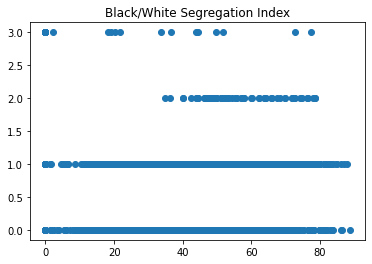

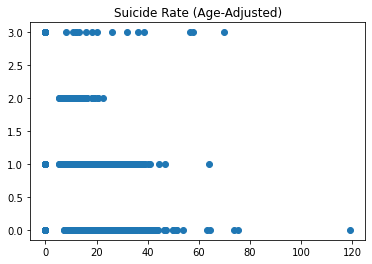

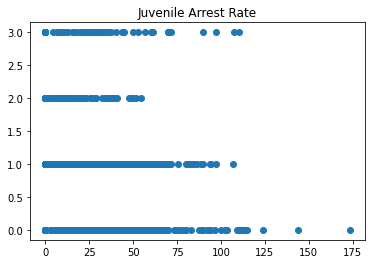

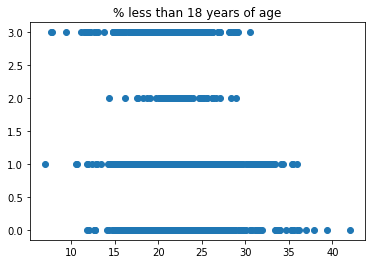

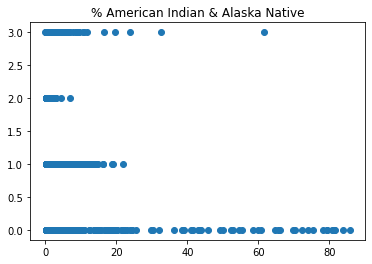

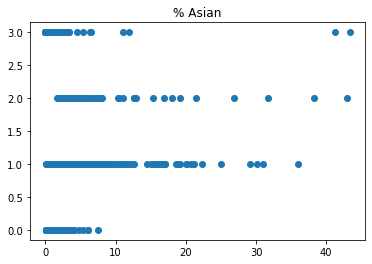

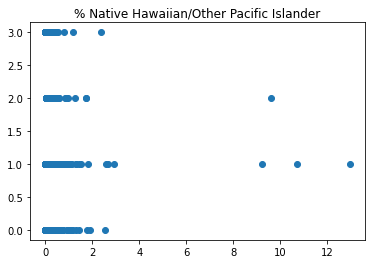

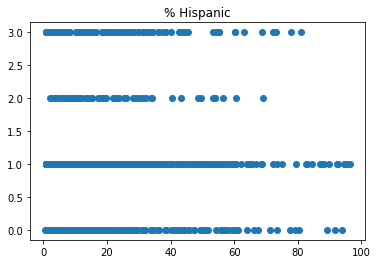

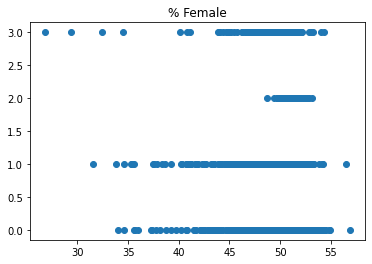

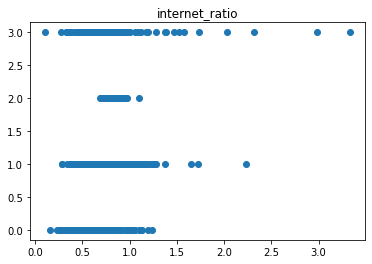

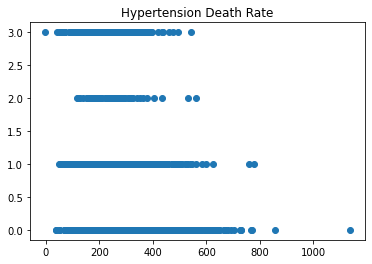

In [115]:
# to supress warnings
import warnings
warnings.simplefilter(action='ignore')

for i in X1.columns:
    plt.figure(frameon=True,)
    plt.scatter(X1[i],y1)
    plt.title(i)
#     plt.savefig(str(i)+".png")

## Violet plot

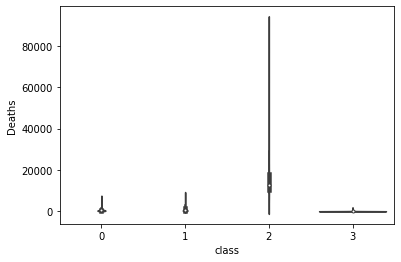

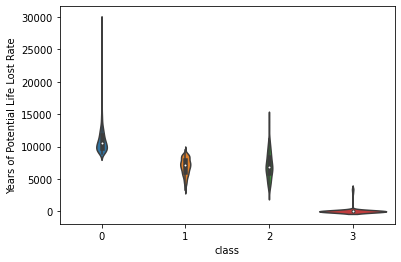

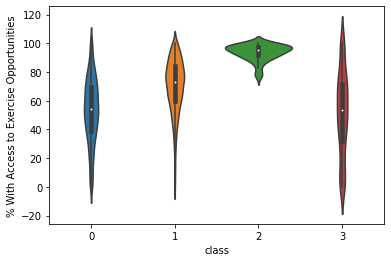

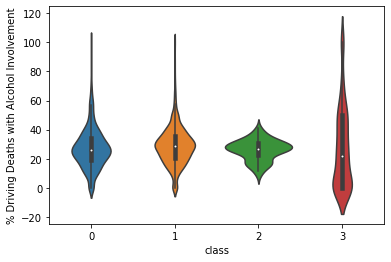

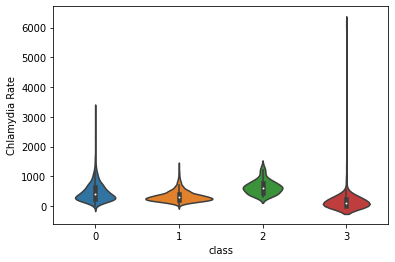

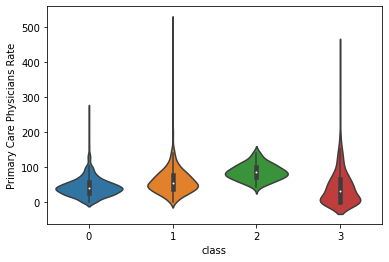

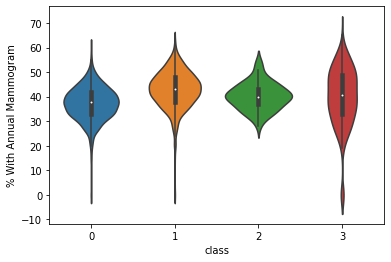

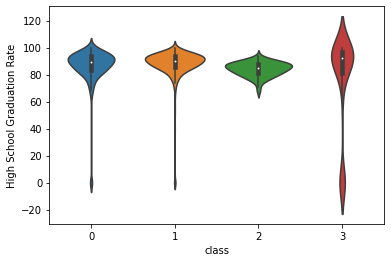

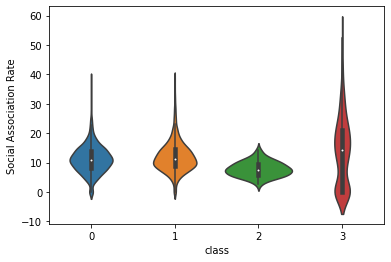

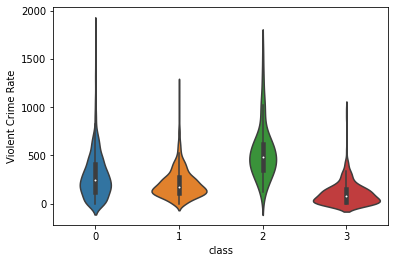

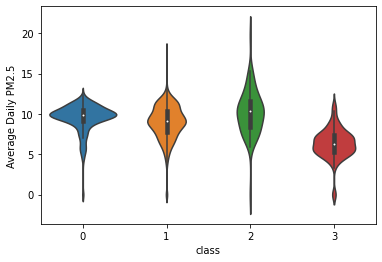

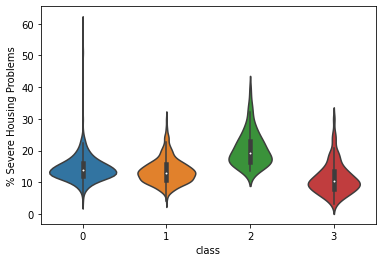

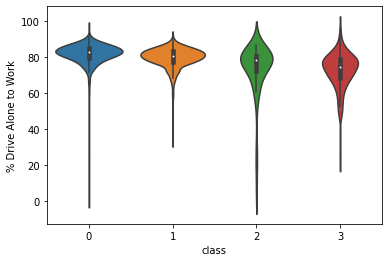

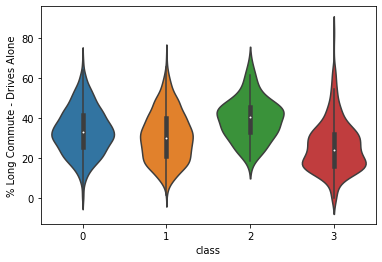

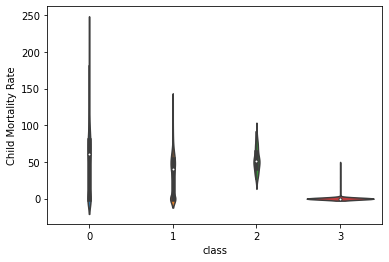

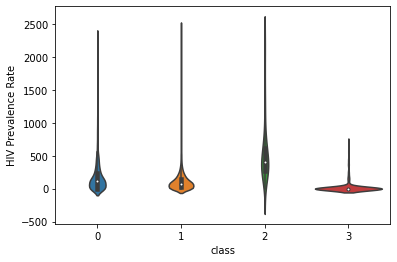

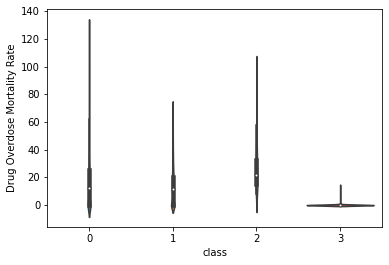

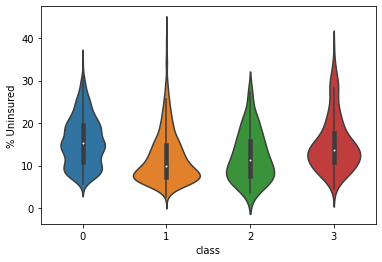

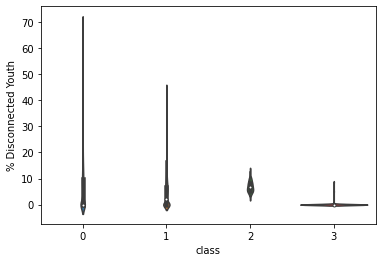

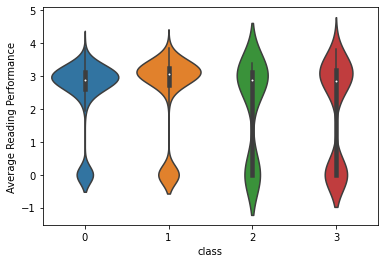

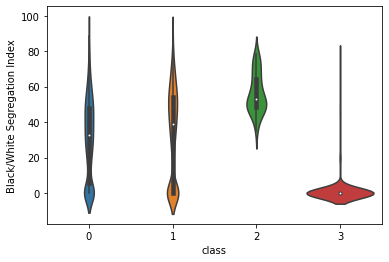

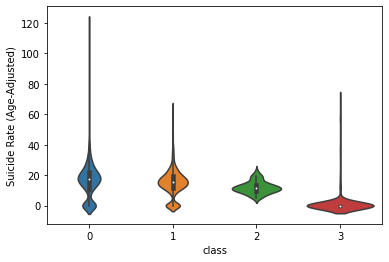

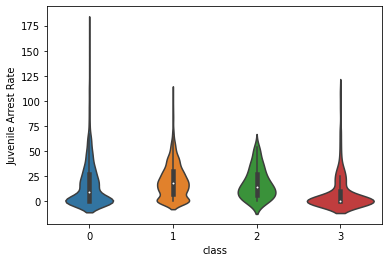

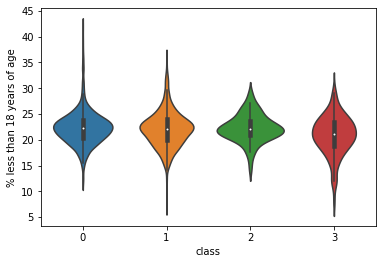

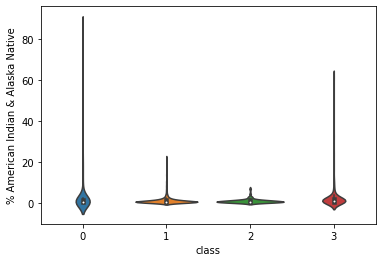

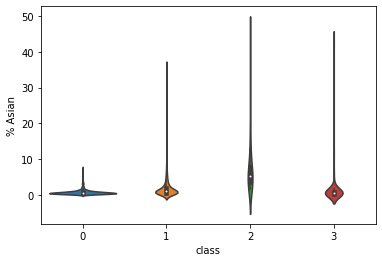

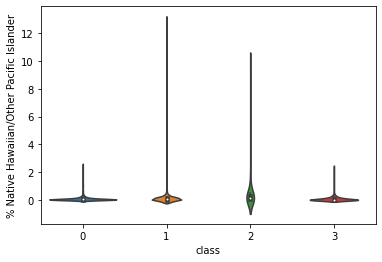

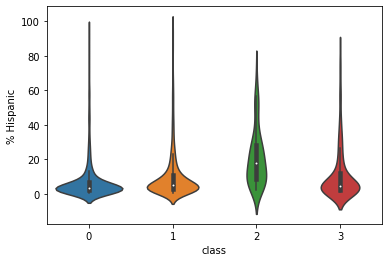

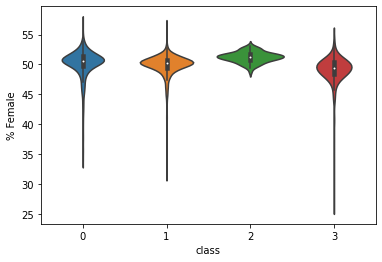

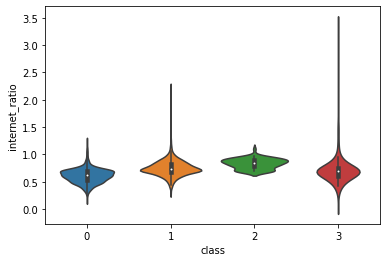

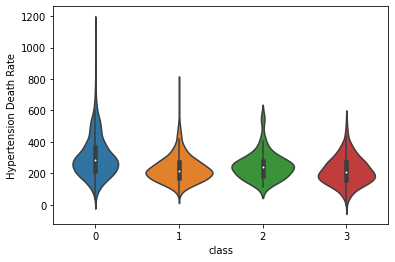

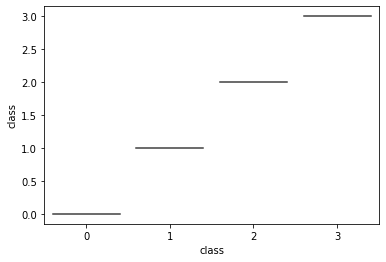

In [116]:
import seaborn as sns


for i in X_red.columns:
    plt.figure(frameon=True,)
    sns.violinplot(x='class',y=X_red[i],data=X_red)
#     plt.savefig(str(i)+".png")

## Box Plot

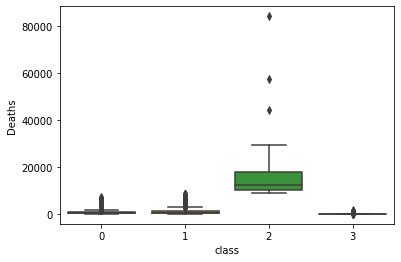

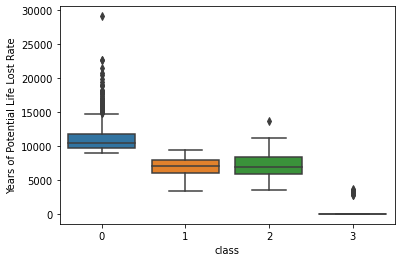

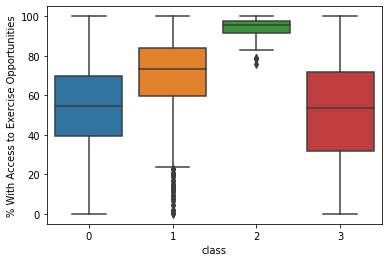

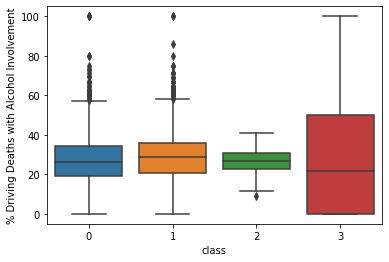

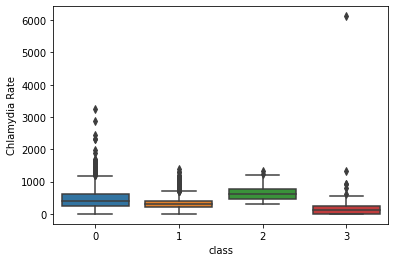

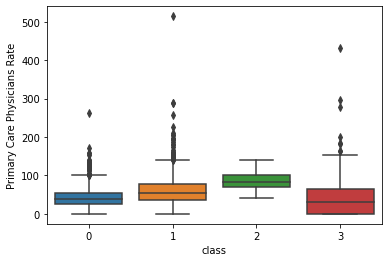

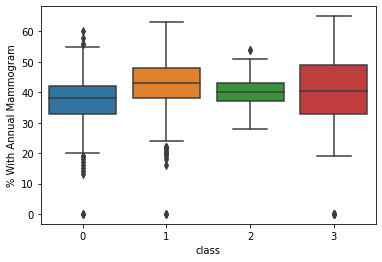

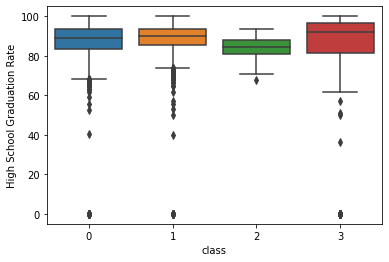

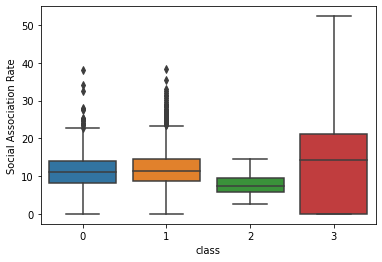

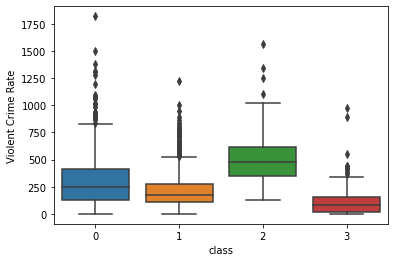

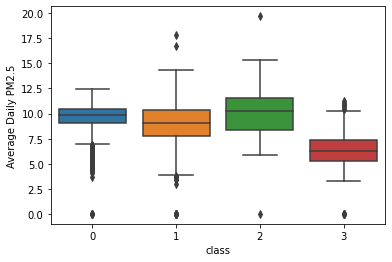

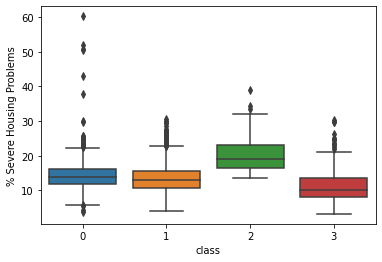

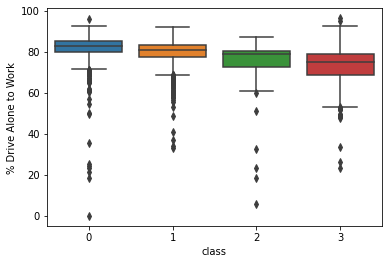

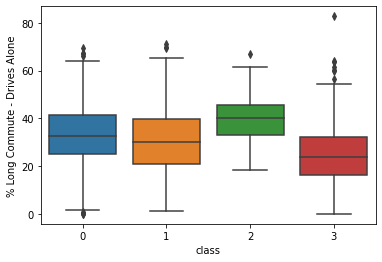

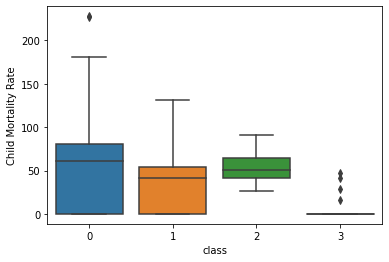

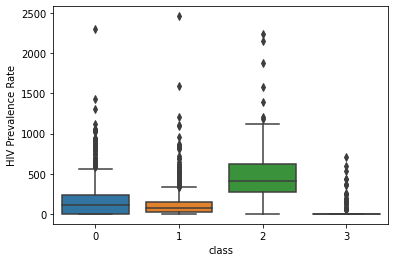

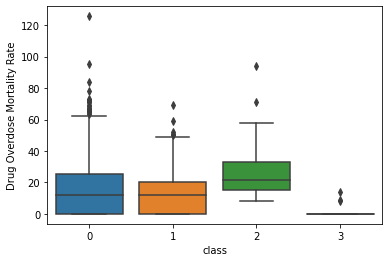

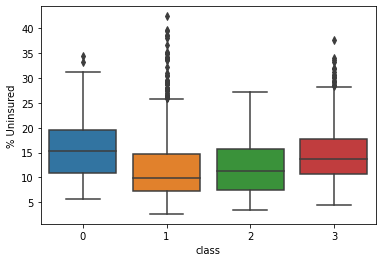

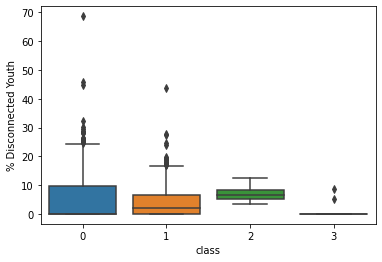

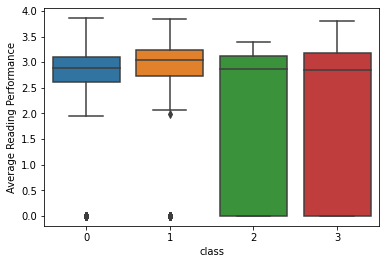

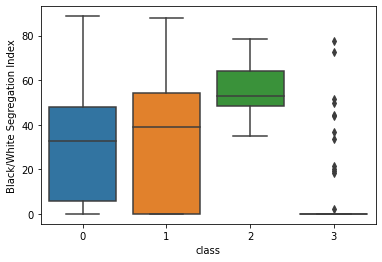

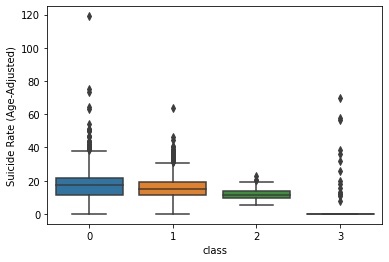

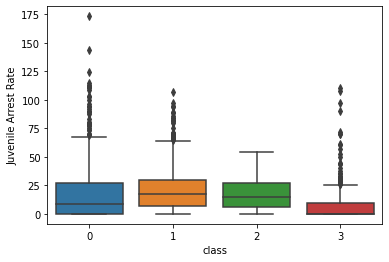

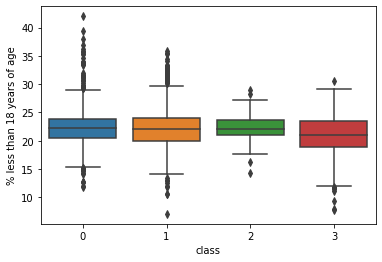

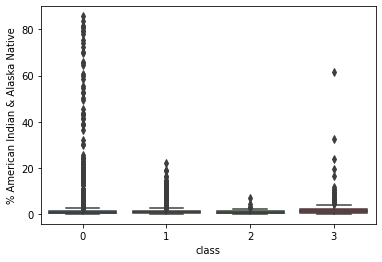

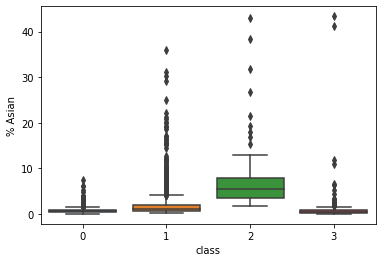

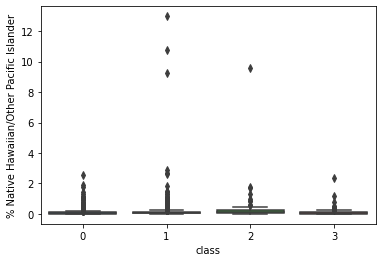

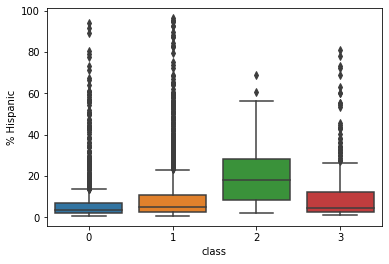

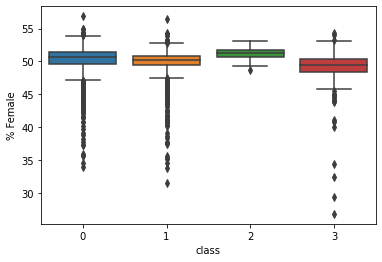

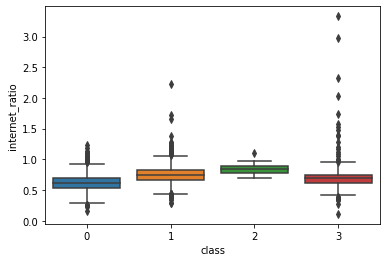

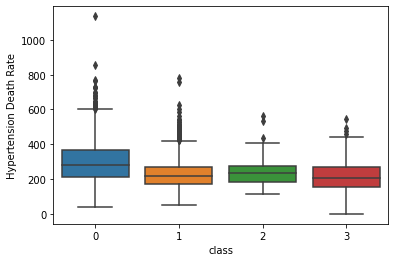

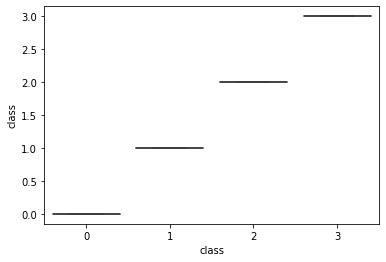

In [117]:
for i in X_red.columns:
    try:
        plt.figure(frameon=True,)
        sns.boxplot(x='class',y=X_red[i],data=X_red)
#         plt.savefig(str(i)+".png")
    except:
        pass

# Elbow method for number of clusters

Cluster 2 Inertia 47199465359.48202
Cluster 3 Inertia 31622076354.771194
Cluster 4 Inertia 21771556199.943165
Cluster 5 Inertia 14744821628.556482
Cluster 6 Inertia 11640986788.941378
Cluster 7 Inertia 8716677662.383455
Cluster 8 Inertia 7401398296.245372
Cluster 9 Inertia 6395281484.175753
Cluster 10 Inertia 5553601676.592009
Cluster 11 Inertia 4910718380.879466
Cluster 12 Inertia 4331419128.148833
Cluster 13 Inertia 3893344965.1907053
Cluster 14 Inertia 3543490377.8930984
Cluster 15 Inertia 3283398210.5448055
Cluster 16 Inertia 3032748200.73209
Cluster 17 Inertia 2835946488.4613976
Cluster 18 Inertia 2659648071.507802
Cluster 19 Inertia 2528950505.8202085
Cluster 20 Inertia 2414086674.5153522
Cluster 21 Inertia 2304517120.131888
Cluster 22 Inertia 2186428647.2910843
Cluster 23 Inertia 2105080355.912654
Cluster 24 Inertia 2016218290.204309
Cluster 25 Inertia 1930477959.7260115
Cluster 26 Inertia 1853570024.8319988
Cluster 27 Inertia 1803164731.0324202
Cluster 28 Inertia 1718577606.398

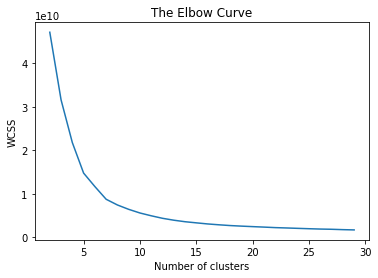

In [58]:
wcss = []  #Within-Cluster-Sum-of-Squares

for i in range(2,30):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_red)
    wcss.append(kmeans.inertia_)
    print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(2,30),wcss)
plt.title("The Elbow Curve")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS") #
plt.show()

In [59]:
# 4 cluster seems a good choice

kmeans=  KMeans(
               n_clusters=4,
               init="k-means++",
               n_init=50,
               max_iter=500,
               random_state=42,
           )

In [61]:
kmeans.fit(X)


KMeans(max_iter=500, n_clusters=4, n_init=50, random_state=42)

In [62]:
y_pred=kmeans.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

# Silhoutte Score

In [63]:
X=X_red

In [64]:
import seaborn as sns
from sklearn.metrics import silhouette_score
n_clu = []
km_ss = []

start=2
end=20
# Create a for loop to find optimal n_clusters
for n_clusters in range(start,end):

    # Create cluster labels
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X)
    silhouette_avg = round(silhouette_score(X, labels, random_state=1), 3)
    km_ss.append(silhouette_avg)
    n_clu.append(n_clusters)

    print("No. Clusters: {}, Silhouette Score: {}, Change from Previous Cluster: {}".format(
        n_clusters, silhouette_avg, (km_ss[n_clusters - start] - km_ss[n_clusters - start - 1]).round(3)))

#     # Plot graph at the end of loop
#     if n_clusters == end - 1:
#         plt.figure(figsize=(12,4))

#         plt.title('Silhouette Score')
#         plt.xlabel("Number of clusters")
#         sns.pointplot(x=n_clu, y=km_ss)
#         plt.tight_layout()
#         plt.show()

No. Clusters: 2, Silhouette Score: 0.412, Change from Previous Cluster: 0.0
No. Clusters: 3, Silhouette Score: 0.429, Change from Previous Cluster: 0.017
No. Clusters: 4, Silhouette Score: 0.48, Change from Previous Cluster: 0.051
No. Clusters: 5, Silhouette Score: 0.495, Change from Previous Cluster: 0.015
No. Clusters: 6, Silhouette Score: 0.508, Change from Previous Cluster: 0.013
No. Clusters: 7, Silhouette Score: 0.471, Change from Previous Cluster: -0.037
No. Clusters: 8, Silhouette Score: 0.426, Change from Previous Cluster: -0.045
No. Clusters: 9, Silhouette Score: 0.437, Change from Previous Cluster: 0.011
No. Clusters: 10, Silhouette Score: 0.415, Change from Previous Cluster: -0.022
No. Clusters: 11, Silhouette Score: 0.416, Change from Previous Cluster: 0.001
No. Clusters: 12, Silhouette Score: 0.424, Change from Previous Cluster: 0.008
No. Clusters: 13, Silhouette Score: 0.403, Change from Previous Cluster: -0.021
No. Clusters: 14, Silhouette Score: 0.412, Change from Prev

## Silhouette plots

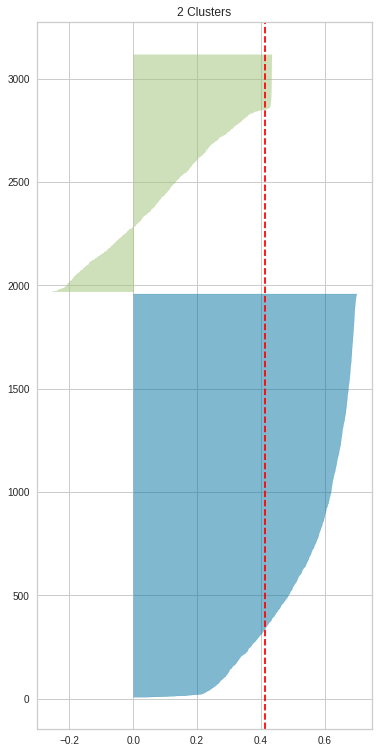

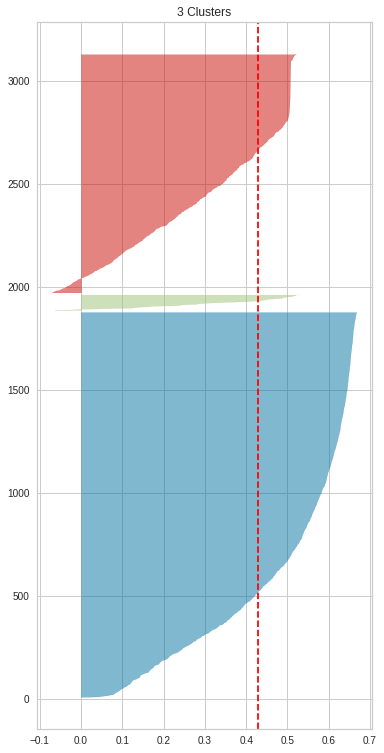

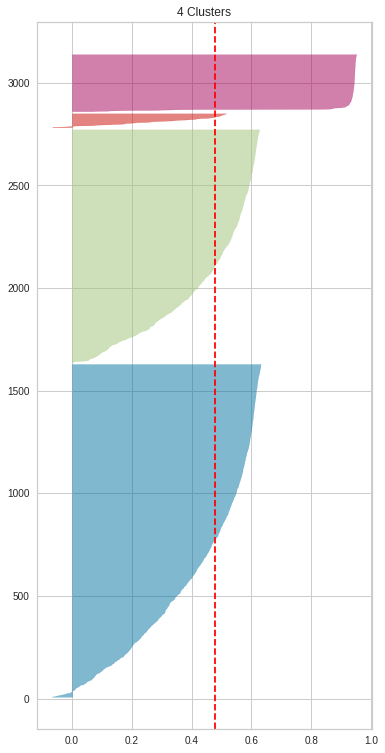

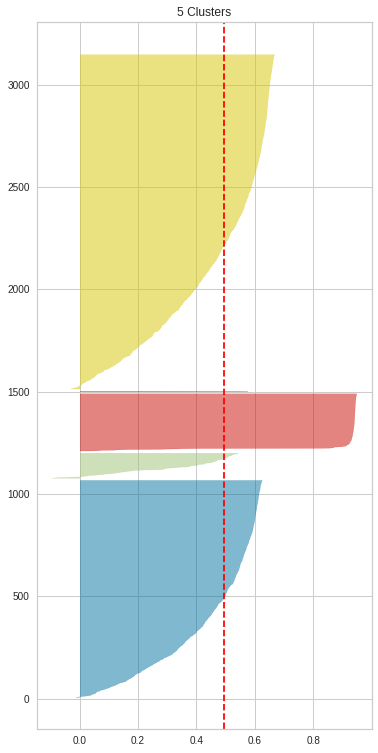

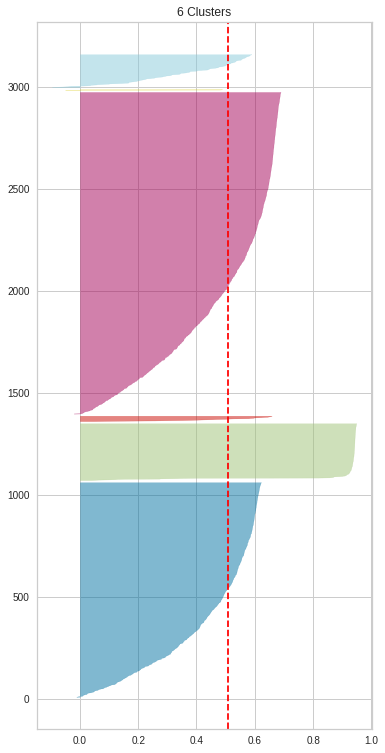

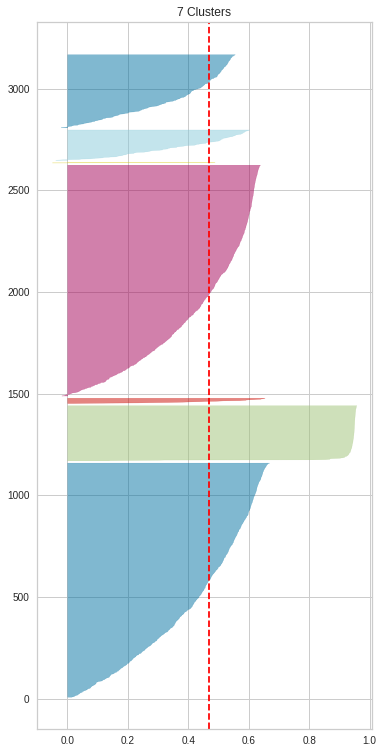

In [58]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2,8):
    plt.figure(figsize=(6,13))
    plt.title(str(i)+" Clusters")
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=500, random_state=13)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(X)
    

## 4 is good a choice

# Davies_bouldin_score

This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Zero is the lowest possible score. Values closer to zero indicate a better partition.

In [82]:
from sklearn.metrics import davies_bouldin_score
for i in range(2,20):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score=davies_bouldin_score(X, labels)
    print("Cluster", i, "Davis Score", score)

Cluster 2 Davis Score 0.47550123334334254
Cluster 3 Davis Score 0.5096188474326439
Cluster 4 Davis Score 0.3691311762980813
Cluster 5 Davis Score 0.42587283049096936
Cluster 6 Davis Score 0.3595133736987386
Cluster 7 Davis Score 0.39522693954813404
Cluster 8 Davis Score 0.4092069613341713
Cluster 9 Davis Score 0.43141796030379326
Cluster 10 Davis Score 0.45601149915001693
Cluster 11 Davis Score 0.4819723996829502
Cluster 12 Davis Score 0.43674362442431197
Cluster 13 Davis Score 0.4447879857352897
Cluster 14 Davis Score 0.4759942745917794
Cluster 15 Davis Score 0.49162721592369446
Cluster 16 Davis Score 0.5090239743191141
Cluster 17 Davis Score 0.5501004416474052
Cluster 18 Davis Score 0.5664543328444318
Cluster 19 Davis Score 0.5608556031963869


### for n_cluster=4 score is lower than most of the clusters, 4 is a good choice

# Calinski-Harabasz Index

The index is the ratio of the sum of between-clusters dispersion and of inter-cluster dispersion for all clusters (where dispersion is defined as the sum of distances squared).

The score is higher when clusters are dense and well separated.


In [25]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score=metrics.calinski_harabasz_score(X, labels)
    print("Cluster", i, "Calinski index", score)

Cluster 2 Calinski index 3187.010196987673
Cluster 3 Calinski index 4438.524260911717
Cluster 4 Calinski index 6784.8864252814055
Cluster 5 Calinski index 8185.631938306322
Cluster 6 Calinski index 11153.643504866173
Cluster 7 Calinski index 13957.72518760788
Cluster 8 Calinski index 17300.444597189766
Cluster 9 Calinski index 19644.76579831533
